In [4]:
import requests

In [5]:
url = 'https://www.pagina12.com.ar/'

In [6]:
p12 = requests.get(url)

In [7]:
p12.status_code

200

In [8]:
p12.text

'<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>Página12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer político de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="Página12 | La otra mirada"><meta prope

In [9]:
p12.request.headers

{'User-Agent': 'python-requests/2.24.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [10]:
from bs4 import BeautifulSoup

In [11]:
s = BeautifulSoup(p12.text,'lxml')

In [12]:
type(s)

bs4.BeautifulSoup

In [13]:
print(s.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   Página12 | La otra mirada
  </title>
  <meta content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg" name="google-site-verification"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}
  </script>
  <meta content="Notas focalizadas en el quehacer político de la Argentina." name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="Página12 | La otra mirada" na

In [15]:
secciones = s.find('ul',attrs={'class':'horizontal-list main-sections hide-on-dropdown'}).find_all('li')

link_secciones = [secion.a.get('href') for secion in secciones]
link_secciones
    


['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/cultura']

In [20]:
box = [requests.get(seccion) for seccion in link_secciones]
box

[<Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>]

In [21]:
box_links =[BeautifulSoup(i.text,'lxml') for i in box]

box_link =[i.find('div',attrs={'class':'article-item__content'}) for i in box_links]

# box_link =[i.a.get('href') for i in box_link]


box_link.pop(3)

print(box_link)



#for i in box_link:
 #   print(i.a)
    

#'//div[@class="article-item__content"]/h3[@class="title-list"]/a/@href

[<div class="article-item__content"><!-- Title --><h2 class="title-list"><a href="https://www.pagina12.com.ar/319202-el-gobierno-habilito-al-congreso-a-tratar-el-proyecto-para-s">El Gobierno habilitó al Congreso a tratar el proyecto para suspender las PASO</a></h2><!-- Kicker --><p><a href="https://www.pagina12.com.ar/319202-el-gobierno-habilito-al-congreso-a-tratar-el-proyecto-para-s">Con un decreto firmado este viernes</a></p></div>, <div class="article-item__content"><!-- Title --><h2 class="title-list"><a href="https://www.pagina12.com.ar/319212-alberto-fernandez-expondra-el-jueves-en-el-foro-de-davos">Alberto Fernández expondrá el jueves en el Foro de Davos</a></h2><!-- Kicker --><p><a href="https://www.pagina12.com.ar/319212-alberto-fernandez-expondra-el-jueves-en-el-foro-de-davos">Lo hará de modo remoto; el encuentro comienza el lunes </a></p></div>, <div class="article-item__content"><!-- Title --><h2 class="title-list"><a href="https://www.pagina12.com.ar/319221-la-juventud-de

In [22]:
link = [i.a.get('href') for i in box_link]

link

['https://www.pagina12.com.ar/319202-el-gobierno-habilito-al-congreso-a-tratar-el-proyecto-para-s',
 'https://www.pagina12.com.ar/319212-alberto-fernandez-expondra-el-jueves-en-el-foro-de-davos',
 'https://www.pagina12.com.ar/319221-la-juventud-de-la-matanza-colabora-para-la-inscripcion-en-bu',
 'https://www.pagina12.com.ar/319119-armani-y-borre-estan-muy-comodos-en-river',
 'https://www.pagina12.com.ar/319206-cientos-de-detenidos-en-rusia-en-protestas-de-partidarios-de',
 'https://www.pagina12.com.ar/319222-dia-del-musico-una-fecha-que-recuerda-a-luis-alberto-spinett']

In [23]:
url_w = link[0]

#https://www.pagina12.com.ar/319110-raul-zaffaroni-no-renovara-su-mandato-como-juez-de-la-corte-

In [24]:
#traer el cuerpo del artículo
try:
    noticia1 = requests.get(url_w)
    if noticia1.status_code == 200:
        s_noticia = BeautifulSoup(noticia1.text,'lxml')
        article_text = s_noticia.find('div',attrs={'class':"article-text"})
        print(article_text.get_text())
    
    
except Exception as e:
    print(f'Error\n {e}\n')

El Gobierno amplió con un decreto firmado este viernes a última hora el temario a tratar en las sesiones extraordinarias del Congreso y la principal novedad llegó en el último ítem del anexo, que refiere a "Emergencia Sanitaria y Calendario Electoral 2021".La incorporación del Calendario Electoral de este año al debate parlamentario habilitará a los legisladores a producir cambios en la realización de los comicios de medio término.Con esta decisión, el Ejecutivo faculta al Congreso a debatir eventuales modificaciones en el cronograma electoral que podrían o no incluir la postergación de las fechas de las Primarias Abiertas Simultáneas y Obligatorias (PASO) y las elecciones generales.La discusión del calendario de elecciones podría derivar, si se alcanzan los consensos, en la suspensión por única vez de las primarias.Esta iniciativa es impulsada por algunos gobernadores del oficialismo pero resistida por otros sectores del Frente de Todos y de la oposición.La ampliación del temario de l

In [25]:
# Traer el copete del artículo
try:
    noticia1 = requests.get(url_w)
    if noticia1.status_code == 200:
        s_noticia1 = BeautifulSoup(noticia1.text,'lxml')
        copete_article = s_noticia1.find('h2',attrs={'class':'article-prefix'})
        print(copete_article.text)
        
except Exception as e:
    print(f' -*-  Error  -*-\n {e}\n')

Con un decreto firmado este viernes


In [26]:
# Traer la volanta del artículo 
try:
    noticia1 = requests.get(url_w)
    if noticia1.status_code == 200:
        s_noticia1 = BeautifulSoup(noticia1.text,'lxml')
        volanta_article = s_noticia1.find('div',attrs={'class':'article-summary'})
        print(volanta_article.text)
        
except Exception as e:
    print(f' -*-  Error  -*-\n {e}\n')

La iniciativa es impulsada por algunos gobernadores del oficialismo pero resistida por otros sectores del Frente de Todos y de la oposición. Con esta decisión, el Ejecutivo faculta a debatir modificaciones en el cronograma electoral.


In [66]:
from IPython.display import Image 

try:
    def imagen(soup):
        try:
            imagen_article = soup.find('div',attrs={'class':'article-main-media-image'})
            imagenes = imagen_article.find_all('img')
            
            if len(imagenes) != 0:
                imagen_src = imagenes[-1].get('data-src')
                
                try:
                    imagen_req = requests.get(imagen_src)
                    
                    if imagen_req.status_code == 200:
                        
                        return imagen_req.content
                    else:
                        print('La url tiene un código diferente a 200')
                    
                except Exception as e:
                    print(f'Error \n{e}')
            else:
                print('La lista esta vacía')
        
        except Exception as e:
            print(f'Error \n{e}')

except Exception as e:
    print(f'Error \n{e}')

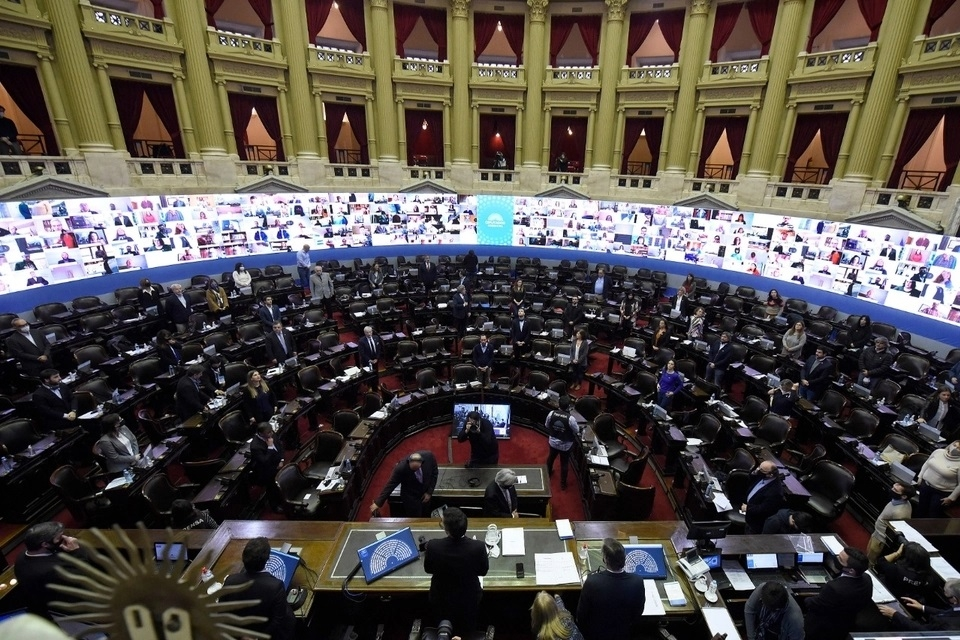

In [68]:
Image(imagen(s_noticia1))

In [61]:
test = s_noticia1.find('div',attrs={'class':'article-main-media-image'})
tests = test.find_all('img')
tests[0].get('data-src')


'https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2021-01/135954-135330-recinto-20diputados_0.jpg?itok=0CKaVLYz'